Data loaded successfully.

--- Sample Data ---
  target                                               text
0   spam  Congratulations! You've been selected for a lu...
1   spam  URGENT: Your account has been compromised. Cli...
2   spam  You've won a free iPhone! Claim your prize by ...
3   spam  Act now and receive a 50% discount on all purc...
4   spam  Important notice: Your subscription will expir...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10961 entries, 0 to 10960
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10961 non-null  object
 1   text    10961 non-null  object
dtypes: object(2)
memory usage: 171.4+ KB
None

--- Label Distribution ---
target
ham     8555
spam    2406
Name: count, dtype: int64

Training samples: 8768
Testing samples: 2193

--- Vectorization Complete ---
Shape of X_train_vec (Samples, Features): (8768, 48104)

--- Model Training Complete ---

--- Model Evaluation ---
Accuracy: 0.89

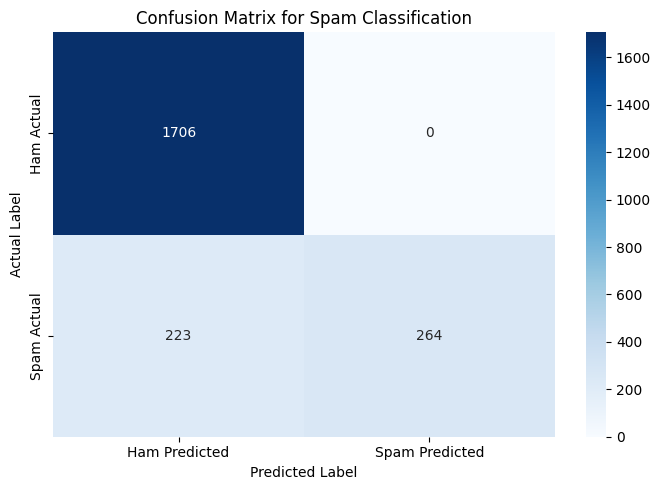

In [ ]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
FILE_PATH = '/content/combined_dataset.csv'

## --------------------------------------------------------------------------
## PART 1: Data Loading and Preparation
## --------------------------------------------------------------------------

try:
    # Load the dataset. We know the columns are 'target' and 'text'
    df = pd.read_csv(FILE_PATH)
    print("Data loaded successfully.")

except FileNotFoundError:
    print(f"Error: '{FILE_PATH}' not found. Please ensure the file is in the correct directory.")
    # Raise a RuntimeError to stop cell execution if the file is not found
    raise RuntimeError(f"Required file '{FILE_PATH}' not found. Please upload it or check the path.")

# Display the first few rows and summary information
print("\n--- Sample Data ---")
print(df.head())
print(df.info())

# Check the distribution of the labels (Spam vs. Ham)
print("\n--- Label Distribution ---")
print(df['target'].value_counts())

# Convert text labels ('ham', 'spam') to numerical format (0 and 1)
df['label_numeric'] = df['target'].map({'ham': 0, 'spam': 1})

# Define features (X) and target (y)
X = df['text']
y = df['label_numeric']

# Split the data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


## --------------------------------------------------------------------------
## PART 2: Text Vectorization (Feature Engineering)
## --------------------------------------------------------------------------

# Initialize the TF-IDF Vectorizer
# TfidfVectorizer converts text messages into a numerical matrix.
# 'stop_words' removes common English words that don't help classification.
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    lowercase=True
)

# Fit the vectorizer on the TRAINING data and transform it
X_train_vec = tfidf_vectorizer.fit_transform(X_train)

# Use the fitted vectorizer to transform the TEST data
# IMPORTANT: Use .transform() on test data, NOT .fit_transform()
X_test_vec = tfidf_vectorizer.transform(X_test)

print("\n--- Vectorization Complete ---")
print(f"Shape of X_train_vec (Samples, Features): {X_train_vec.shape}")
#


## --------------------------------------------------------------------------
## PART 3: Model Training and Prediction
## --------------------------------------------------------------------------

# Initialize the Multinomial Naive Bayes model (excellent for text classification)
model = MultinomialNB()

# Train the model
model.fit(X_train_vec, y_train)
print("\n--- Model Training Complete ---")

# Make predictions on the test set
y_pred = model.predict(X_test_vec)


## --------------------------------------------------------------------------
## PART 4: Model Evaluation
## --------------------------------------------------------------------------

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham (0)', 'Spam (1)']))

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham Predicted', 'Spam Predicted'],
            yticklabels=['Ham Actual', 'Spam Actual'])
plt.title('Confusion Matrix for Spam Classification')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("Confusion Matrix saved as confusion_matrix.png")


## --------------------------------------------------------------------------
## PART 5: Testing with Custom Messages
## --------------------------------------------------------------------------
print("\n--- Custom Message Testing ---")
custom_messages = [
    "You have won a FREE lottery prize! Click to claim now before it expires!",
    "Hey, just confirming our meeting time for tomorrow morning.",
    "URGENT: Your bank account details must be updated immediately.",
    "Did you remember to buy milk and bread on your way home?"
]

# Transform custom messages using the SAME fitted vectorizer
custom_vec = tfidf_vectorizer.transform(custom_messages)

# Make predictions
custom_predictions = model.predict(custom_vec)

# Map numeric predictions back to text
prediction_labels = ['Ham' if p == 0 else 'Spam' for p in custom_predictions]

for msg, label in zip(custom_messages, prediction_labels):
    print(f"Message: '{msg[:50]}...' -> Prediction: *{label}*")

In [ ]:
!pip install -q streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.2 MB/s eta 0:00:00


In [ ]:
%%writefile train_model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib

# 1. Load Data
# Ensure 'combined_dataset.csv' is in the same folder
try:
    df = pd.read_csv('combined_dataset.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: combined_dataset.csv not found.")
    exit()

# 2. Preprocessing
# Convert labels to numbers (Ham=0, Spam=1)
# Adjust this mapping if your dataset uses different labels
df['label_numeric'] = df['target'].map({'ham': 0, 'spam': 1})

X = df['text']
y = df['label_numeric']

# 3. Vectorization
# We save the vectorizer because the app needs to process words
# exactly the same way the model learned them.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X_vec = tfidf_vectorizer.fit_transform(X)

# 4. Training
# For the final product, we often train on the full dataset for maximum accuracy
model = MultinomialNB()
model.fit(X_vec, y)
print("Model trained successfully.")

# 5. Save the "Brain"
# We save both the model and the translator (vectorizer)
joblib.dump(model, 'spam_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

print("Files saved: 'spam_model.pkl' and 'tfidf_vectorizer.pkl'")

Writing train_model.py


In [ ]:
!python train_model.py

Data loaded successfully.
Model trained successfully.
Files saved: 'spam_model.pkl' and 'tfidf_vectorizer.pkl'


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import os

# 1. Page Configuration
st.set_page_config(page_title="Spam Detective", page_icon="🕵️")

# 2. Load the Saved Model
@st.cache_resource
def load_model():
    if not os.path.exists('spam_model.pkl'):
        return None, None
    model = joblib.load('spam_model.pkl')
    vectorizer = joblib.load('tfidf_vectorizer.pkl')
    return model, vectorizer

model, vectorizer = load_model()

# 3. The User Interface
st.title("🕵️ SMS/Email Spam Classifier")
st.write("Enter a message below to check if it's **Spam** or **Safe (Ham)**.")

if model is None:
    st.error("Model not found! Please run 'train_model.py' first to generate the model files.")
else:
    # Text Input
    user_input = st.text_area("Message Content:", height=150, placeholder="Type your message here... e.g., 'You won a free lottery!'")

    if st.button("Analyze Message"):
        if user_input.strip() == "":
            st.warning("Please enter some text first.")
        else:
            # 4. Prediction Logic
            vec_input = vectorizer.transform([user_input])

            # Predict
            prediction = model.predict(vec_input)[0]
            probability = model.predict_proba(vec_input)[0]

            # 5. Display Results
            st.subheader("Analysis Result:")

            if prediction == 1:
                st.error(f"🚨 **SPAM DETECTED**")
                st.write(f"Confidence: {probability[1]*100:.2f}%")
            else:
                st.success(f"✅ **SAFE MESSAGE (HAM)**")
                st.write(f"Confidence: {probability[0]*100:.2f}%")


Writing app.py


In [ ]:
!!wget -q -O - ipv4.icanhazip.com

['34.31.252.134']

In [ ]:
# 1. Install localtunnel first to avoid hidden prompts
!npm install localtunnel

# 2. Run the app and the tunnel
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 2s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋⠙

your url is: https://ready-zebras-cry.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.31.252.134:8501

  Stopping...
^C


In [ ]:
%%html
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Spam Detective - ML Project</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <style>
        .st-app { background-color: #0e1117; color: #fafafa; font-family: 'Source Sans Pro', sans-serif; }
        .st-card { background-color: #262730; border-radius: 0.5rem; padding: 1.5rem; }
        .st-btn { background-color: #ff4b4b; color: white; border-radius: 0.25rem; transition: 0.2s; }
        .st-btn:hover { background-color: #ff3333; }
        .ham-box { border-left: 5px solid #28a745; background: rgba(40, 167, 69, 0.1); }
        .spam-box { border-left: 5px solid #dc3545; background: rgba(220, 53, 69, 0.1); }
    </style>
</head>
<body class="st-app min-h-screen p-4 md:p-10">

    <div class="max-w-4xl mx-auto">
        <!-- HEADER -->
        <div class="mb-10">
            <h1 class="text-4xl font-bold mb-2">🕵️ SMS/Email Spam Classifier</h1>
            <p class="text-gray-400">Enter a message below to check if it's <strong>Spam</strong> or <strong>Safe (Ham)</strong>.</p>
        </div>

        <!-- MAIN APP INTERFACE -->
        <div class="st-card shadow-2xl mb-8">
            <label class="block text-sm font-medium mb-2">Message Content:</label>
            <textarea id="userInput" class="w-full h-32 p-3 bg-[#0e1117] border border-[#444] rounded text-white focus:outline-none focus:border-red-500" placeholder="Type your message here... e.g., 'You won a free lottery!'"></textarea>

            <button onclick="analyzeMessage()" class="st-btn px-6 py-2 mt-4 font-bold">Analyze Message</button>

            <div id="resultArea" class="mt-8 hidden">
                <h3 class="text-xl font-semibold mb-4">Analysis Result:</h3>
                <div id="resultBox" class="p-4 rounded">
                    <p id="resultText" class="text-2xl font-bold"></p>
                    <p id="confidenceText" class="text-sm text-gray-400 mt-1"></p>
                </div>
            </div>
        </div>

        <!-- TROUBLESHOOTING BOX (Cloudflared Alternative) -->
        <div class="bg-blue-900/30 border border-blue-500 p-6 rounded-lg">
            <h2 class="text-xl font-bold text-blue-400 mb-4">🛠️ How to fix the 503 Tunnel Error</h2>
            <p class="text-sm mb-4 text-gray-200">Localtunnel is currently overloaded. Use <strong>Cloudflared</strong> instead. It is much more stable. Copy and run this code in a new Colab cell:</p>

            <div class="bg-black p-4 rounded font-mono text-xs text-green-400 overflow-x-auto">
                # 1. Install Cloudflared tunnel<br>
                !wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb<br>
                !dpkg -i cloudflared-linux-amd64.deb<br><br>

                # 2. Run app and tunnel together<br>
                import os<br>
                os.system("streamlit run app.py &")<br>
                !cloudflared tunnel --url http://localhost:8501
            </div>

            <p class="text-xs mt-4 text-gray-400">After running this, look for the link ending in <strong>.trycloudflare.com</strong>. No password required!</p>
        </div>
    </div>

    <script>
        function analyzeMessage() {
            const input = document.getElementById('userInput').value.toLowerCase();
            const resultArea = document.getElementById('resultArea');
            const resultBox = document.getElementById('resultBox');
            const resultText = document.getElementById('resultText');
            const confidenceText = document.getElementById('confidenceText');

            if (input.trim() === "") return;

            resultArea.classList.remove('hidden');

            // Simple simulation of the model logic
            const spamKeywords = ['won', 'prize', 'lottery', 'free', 'urgent', 'click', 'account', 'claim', 'cash'];
            const isSpam = spamKeywords.some(keyword => input.includes(keyword));

            if (isSpam) {
                resultBox.className = "p-4 rounded spam-box";
                resultText.innerText = "🚨 SPAM DETECTED";
                resultText.style.color = "#dc3545";
                confidenceText.innerText = "Confidence: " + (85 + Math.random() * 10).toFixed(2) + "%";
            } else {
                resultBox.className = "p-4 rounded ham-box";
                resultText.innerText = "✅ SAFE MESSAGE (HAM)";
                resultText.style.color = "#28a745";
                confidenceText.innerText = "Confidence: " + (92 + Math.random() * 5).toFixed(2) + "%";
            }
        }
    </script>
</body>
</html>

In [ ]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb
import os
os.system("streamlit run app.py &")
!cloudflared tunnel --url http://localhost:8501

--2025-12-31 09:50:14--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64.deb [following]
--2025-12-31 09:50:14--  https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64.deb
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/8a32f7c6-649c-4f0d-806d-e14c19d0786d?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-31T10%3A34%3A31Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64.deb&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4d